In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
pd.set_option("display.float_format", "{:.10f}".format)
# Since Time is upto Nanosecend precision


# EDA on Messages file.

In [22]:
me = pd.read_csv('AMZN_2012-06-21_34200000_57600000_message_5.csv')
me.columns = ["Time","Event_Type","Order_ID","Size","Price","Direction"]
# Renamed the columns in the messages file to more understandable names

In [23]:
me
# The Time is from 9:30 AM to 4:00 PM EST

,Time,Event_Type,Order_ID,Size,Price,Direction
0,34200.1896076700,1,11885113,21,2238100,1
1,34200.1896076700,1,3911376,20,2239600,-1
2,34200.1896076700,1,11534792,100,2237500,1
3,34200.1896076700,1,1365373,13,2240000,-1
4,34200.1896076700,1,11474176,2,2236500,1
...,...,...,...,...,...,...
155929,57599.5458278620,4,286916542,51,2205100,1
155930,57599.9039890460,3,287142900,100,2206200,-1
155931,57599.9552419800,3,286967592,170,2206900,-1
155932,57599.9582446160,1,287174077,100,2206300,-1


In [24]:
# Convert price back to dollar values
me['Price'] = me['Price'] / 10000

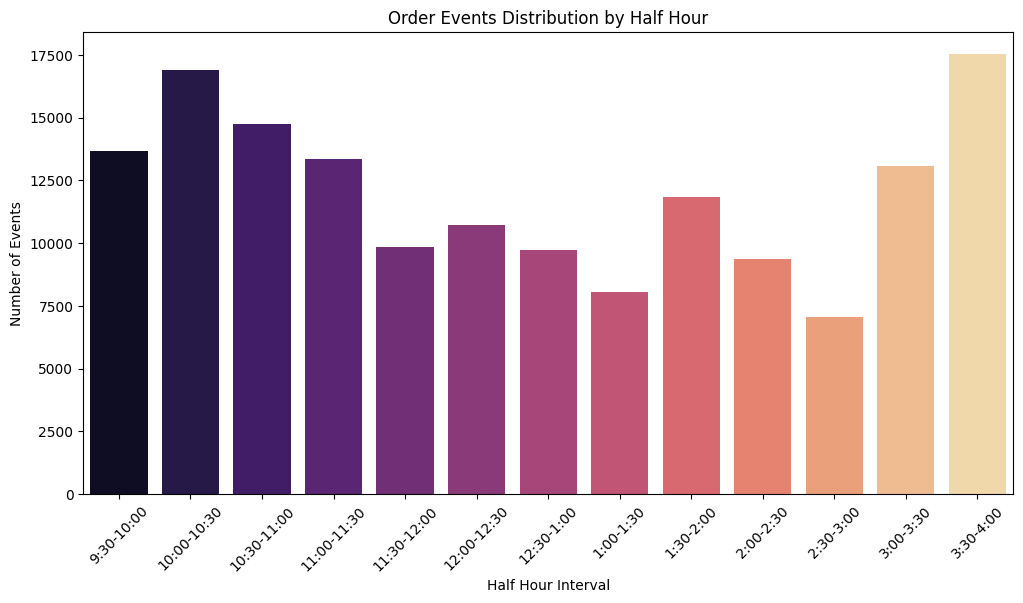

In [25]:
me_filtered = me[(me['Time'] >= 34200) & (me['Time'] <= 57600)]  # Market hours: 9:30 AM to 4:00 PM
me_filtered['Half_Hour'] = (me_filtered['Time'] - 34200) // 1800  # 34200 seconds = 9:30 AM

plt.figure(figsize=(12, 6))
sns.countplot(x='Half_Hour', data=me_filtered, palette='magma')
plt.title('Order Events Distribution by Half Hour')
plt.xlabel('Half Hour Interval')
plt.ylabel('Number of Events')
plt.xticks(ticks=range(13), labels=["9:30-10:00", "10:00-10:30", "10:30-11:00", "11:00-11:30", "11:30-12:00", "12:00-12:30", "12:30-1:00", "1:00-1:30", "1:30-2:00", "2:00-2:30", "2:30-3:00", "3:00-3:30", "3:30-4:00"], rotation=45)
plt.show()

# Time-based analysis (Half Hour)

# From this plot one can see the variation of number of orders as the day passes
# The number of orders are at the highest levels at the start and end of the day.

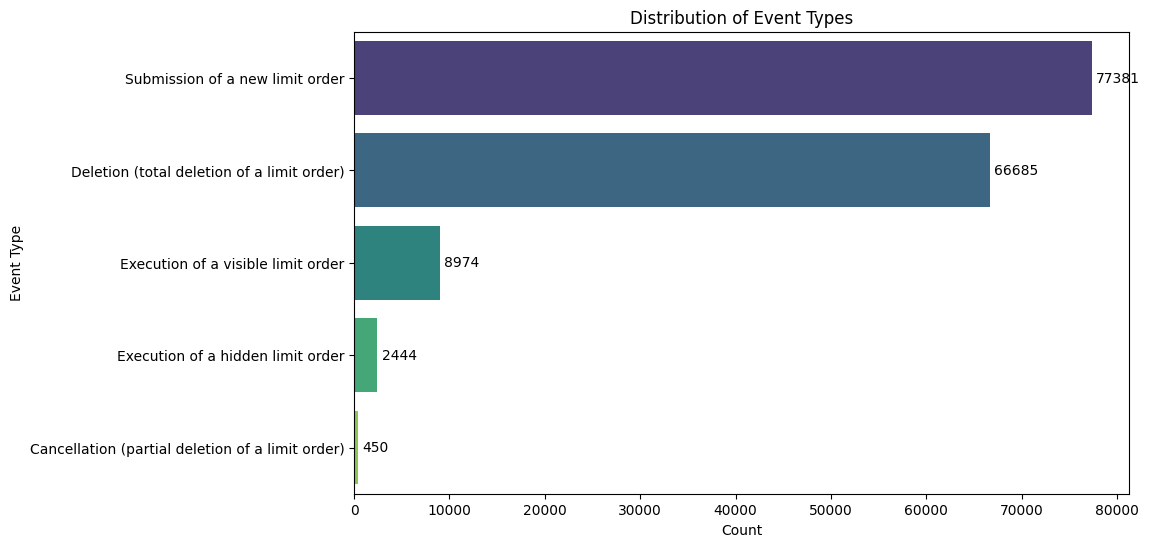

In [26]:
event_type_mapping = {
    1: 'Submission of a new limit order',
    2: 'Cancellation (partial deletion of a limit order)',
    3: 'Deletion (total deletion of a limit order)',
    4: 'Execution of a visible limit order',
    5: 'Execution of a hidden limit order',
    6: 'Indicates a cross trade',
    7: 'Trading halt indicator'
}
me['Event_Type_Description'] = me['Event_Type'].map(event_type_mapping)

# Distribution of event types with counts
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Event_Type_Description', data=me, palette='viridis', order=me['Event_Type_Description'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)
plt.title('Distribution of Event Types')
plt.xlabel('Count')
plt.ylabel('Event Type')
plt.show()


# This plot shows the total number of types of order taking place everyday.

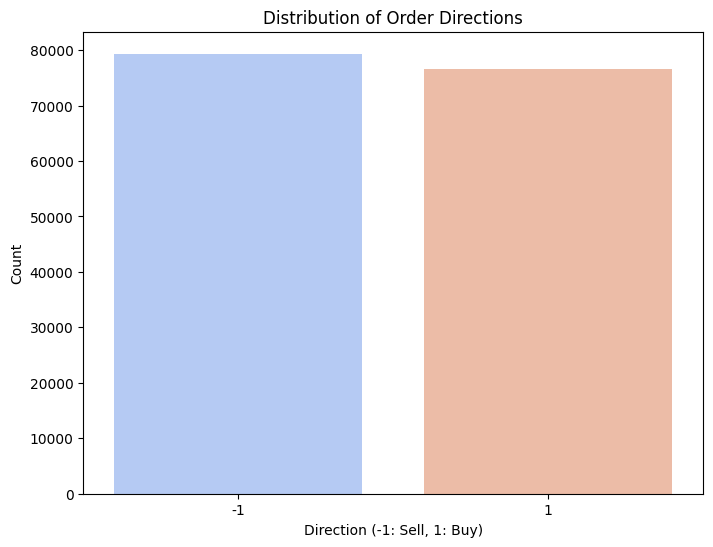

In [27]:
# Distribution of buy vs sell orders
plt.figure(figsize=(8, 6))
sns.countplot(x='Direction', data=me, palette='coolwarm')
plt.title('Distribution of Order Directions')
plt.xlabel('Direction (-1: Sell, 1: Buy)')
plt.ylabel('Count')
plt.show()


# In total slightly more number of Sell Orders(shown in blue) took place than Buy Orders(shown in red).
# Since the number of sell orders is more the market is expected to fall.
# As expected the price fell from 223.81$ to 220.51$

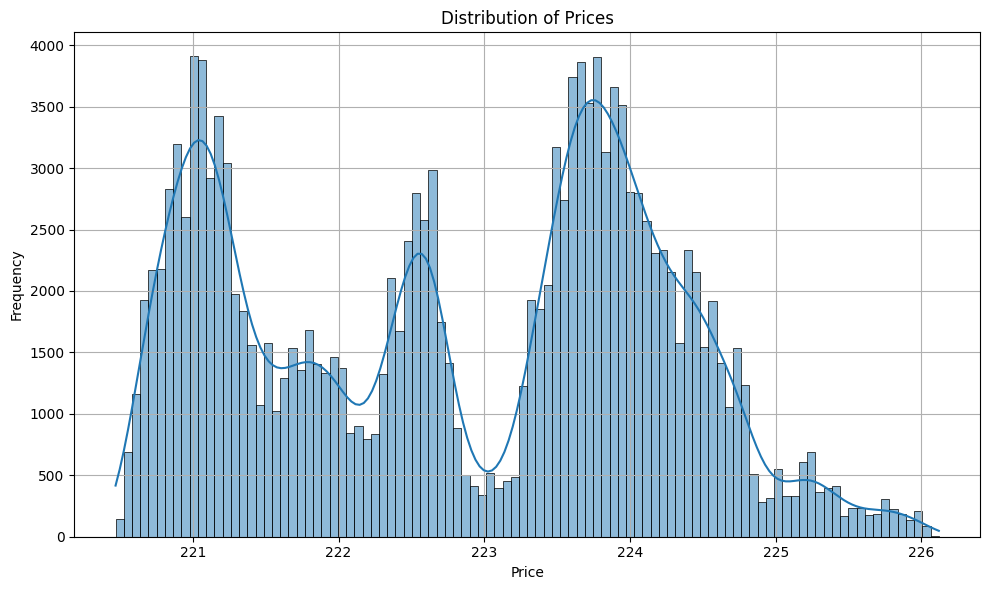

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(me['Price'].dropna(), bins=100, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

# One can see around which price points the price stays around most of the time.
# The price range was divided into 100 bins and the fequency of the price being within a certain bin is plotted.
# Most of the time the price stays around the 221$ and 224$ price point.


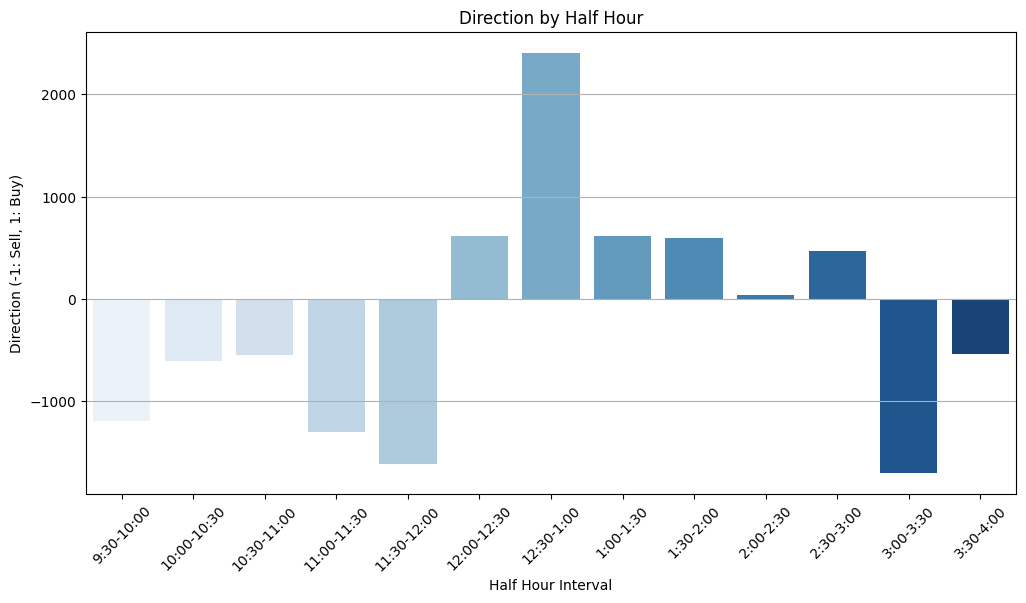

In [29]:

direction_ratio = me_filtered.groupby('Half_Hour')['Direction'].sum().reset_index()
direction_ratio['Half_Hour_Label'] = ["9:30-10:00", "10:00-10:30", "10:30-11:00", "11:00-11:30", "11:30-12:00", "12:00-12:30", "12:30-1:00", "1:00-1:30", "1:30-2:00", "2:00-2:30", "2:30-3:00", "3:00-3:30", "3:30-4:00"]

plt.figure(figsize=(12, 6))
sns.barplot(x='Half_Hour_Label', y='Direction', data=direction_ratio, palette='Blues')
plt.title('Direction by Half Hour')
plt.xlabel('Half Hour Interval')
plt.ylabel('Direction (-1: Sell, 1: Buy)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# The approach was to sum the directions(-1 or 1) in every half hour interval
# One can see how people prefer to place sell orders towars the start and end of the trading day \
# Maximun buying takes place in the middle hours of the day.

In [30]:
me.Size.describe()
# On average the order size is in between 84 to 85.

count   155934.0000000000
mean        84.7156296895
std        210.8926173588
min          1.0000000000
25%         18.0000000000
50%        100.0000000000
75%        100.0000000000
max      33570.0000000000
Name: Size, dtype: float64

In [31]:
me[me['Size']>5000]
# A very small number of huge orders(size>5000) took place.
# These large orders are responsible for some anomilies we will spot in the graphs to be shown later on.

,Time,Event_Type,Order_ID,Size,Price,Direction,Event_Type_Description
58167,41326.1421800980,1,116395061,33570,223.9000000000,1,Submission of a new limit order
58487,41350.7788929810,3,116395061,33570,223.9000000000,1,Deletion (total deletion of a limit order)
58716,41406.0175992920,1,117307230,30900,223.9500000000,1,Submission of a new limit order
58812,41409.6283442150,3,117307230,29700,223.9500000000,1,Deletion (total deletion of a limit order)
133296,55206.5839060910,1,248950276,25000,221.1000000000,1,Submission of a new limit order
133368,55210.8539634350,3,248950276,24989,221.1000000000,1,Deletion (total deletion of a limit order)


# EDA on the orderbook data

In [32]:
book = pd.read_csv('AMZN_2012-06-21_34200000_57600000_orderbook_5.csv')
book.columns = ["Ask_Price_1", "Ask_Size_1", "Bid_Price_1","Bid_Size_1","Ask_Price_2", "Ask_Size_2", "Bid_Price_2","Bid_Size_2","Ask_Price_3",\
                     "Ask_Size_3", "Bid_Price_3","Bid_Size_3","Ask_Price_4", "Ask_Size_4", "Bid_Price_4","Bid_Size_4","Ask_Price_5", "Ask_Size_5",\
                     "Bid_Price_5","Bid_Size_5"]

In [33]:
book[[col for col in book.columns if 'Price' in col]] = book[[col for col in book.columns if 'Price' in col]] / 10000

In [34]:
book['Time'] = me.Time
# Doing EDA of a 5 Level Orderbook.

In [35]:

def calc_stats(df):
    # Calculating the Size and Price Spread for each level/

    df['size_spread_l1'] = df['Ask_Size_1'] - df['Bid_Size_1']
    df['size_spread_l2'] = df['Ask_Size_2'] - df['Bid_Size_2']
    df['size_spread_l3'] = df['Ask_Size_3'] - df['Bid_Size_3']
    df['size_spread_l4'] = df['Ask_Size_4'] - df['Bid_Size_4']


    df['price_spread_l1'] = df['Ask_Price_1'] - df['Bid_Price_1']
    df['price_spread_l2'] = df['Ask_Price_2'] - df['Bid_Price_2']
    df['price_spread_l3'] = df['Ask_Price_3'] - df['Bid_Price_3']
    df['price_spread_l4'] = df['Ask_Price_4'] - df['Bid_Price_4']


    return df


In [36]:
book = calc_stats(book)
# Adding spreads to the data

In [37]:
book.head()

,Ask_Price_1,Ask_Size_1,Bid_Price_1,Bid_Size_1,Ask_Price_2,Ask_Size_2,Bid_Price_2,Bid_Size_2,Ask_Price_3,Ask_Size_3,...,Bid_Size_5,Time,size_spread_l1,size_spread_l2,size_spread_l3,size_spread_l4,price_spread_l1,price_spread_l2,price_spread_l3,price_spread_l4
0,223.9500000000,100,223.8100000000,21,223.9900000000,100,223.1800000000,100,224.0000000000,220,...,10,34200.1896076700,79,0,20,0,0.1400000000,0.8100000000,0.9300000000,1.2100000000
1,223.9500000000,100,223.8100000000,21,223.9600000000,20,223.1800000000,100,223.9900000000,100,...,10,34200.1896076700,79,-80,-100,120,0.1400000000,0.7800000000,0.9200000000,0.9600000000
2,223.9500000000,100,223.8100000000,21,223.9600000000,20,223.7500000000,100,223.9900000000,100,...,100,34200.1896076700,79,-80,0,20,0.1400000000,0.2100000000,0.8100000000,0.9300000000
3,223.9500000000,100,223.8100000000,21,223.9600000000,20,223.7500000000,100,223.9900000000,100,...,100,34200.1896076700,79,-80,0,33,0.1400000000,0.2100000000,0.8100000000,0.9300000000
4,223.9500000000,100,223.8100000000,21,223.9600000000,20,223.7500000000,100,223.9900000000,100,...,200,34200.1896076700,79,-80,98,133,0.1400000000,0.2100000000,0.3400000000,0.8200000000


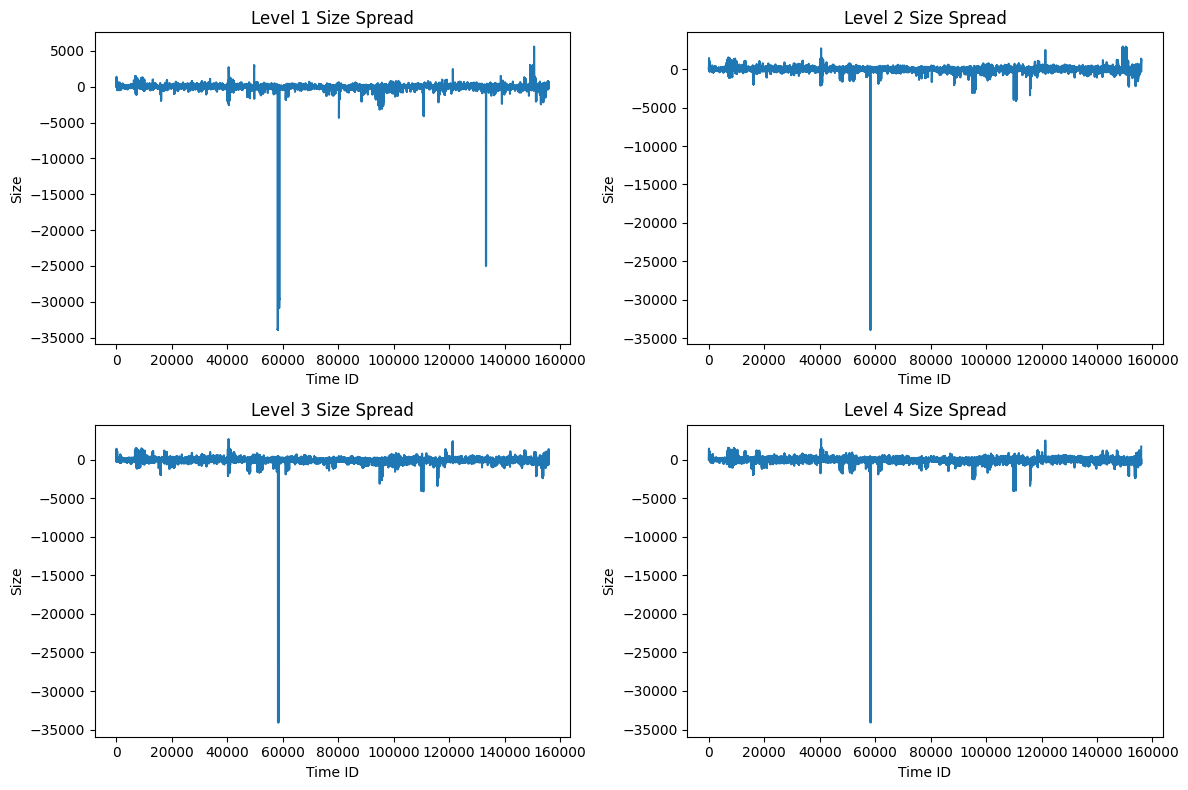

In [38]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(book['size_spread_l1'])
axes[0, 0].set_title('Level 1 Size Spread')
axes[0, 0].set_xlabel('Time ID')
axes[0, 0].set_ylabel('Size')

axes[0, 1].plot(book['size_spread_l2'])
axes[0, 1].set_title('Level 2 Size Spread')
axes[0, 1].set_xlabel('Time ID')
axes[0, 1].set_ylabel('Size')

axes[1, 0].plot(book['size_spread_l3'])
axes[1, 0].set_title('Level 3 Size Spread')
axes[1, 0].set_xlabel('Time ID')
axes[1, 0].set_ylabel('Size')

axes[1, 1].plot(book['size_spread_l4'])
axes[1, 1].set_title('Level 4 Size Spread')
axes[1, 1].set_xlabel('Time ID')
axes[1, 1].set_ylabel('Size')

plt.tight_layout()
plt.show()

# From the plot below we can see that the spread on the size offered widens significantly at certain periods,\
# this is most likely due to market volatility which causes a sudden bout of illiquidity as market participants \
# try and all dump/buy at once

In [39]:
book.sort_values(by='size_spread_l1', ascending=True)
# Can see why size spread is really large at some Time ID's

,Ask_Price_1,Ask_Size_1,Bid_Price_1,Bid_Size_1,Ask_Price_2,Ask_Size_2,Bid_Price_2,Bid_Size_2,Ask_Price_3,Ask_Size_3,...,Bid_Size_5,Time,size_spread_l1,size_spread_l2,size_spread_l3,size_spread_l4,price_spread_l1,price_spread_l2,price_spread_l3,price_spread_l4
58225,224.0200000000,23,223.9000000000,33970,224.0300000000,100,223.8600000000,100,224.0500000000,100,...,23,41328.7927221170,-33947,0,77,-123,0.1200000000,0.1700000000,0.2200000000,0.2500000000
58218,224.0200000000,23,223.9000000000,33970,224.0300000000,118,223.8600000000,100,224.0400000000,100,...,21,41327.1028512870,-33947,18,77,77,0.1200000000,0.1700000000,0.2200000000,0.2400000000
58219,224.0200000000,23,223.9000000000,33970,224.0300000000,118,223.8600000000,100,224.0400000000,100,...,21,41327.2529276650,-33947,18,77,77,0.1200000000,0.1700000000,0.2200000000,0.2400000000
58220,224.0200000000,23,223.9000000000,33970,224.0300000000,100,223.8600000000,100,224.0400000000,100,...,21,41328.7391261140,-33947,0,77,77,0.1200000000,0.1700000000,0.2200000000,0.2400000000
58221,224.0200000000,23,223.9000000000,33970,224.0300000000,100,223.8600000000,100,224.0400000000,100,...,21,41328.7488882170,-33947,0,77,77,0.1200000000,0.1700000000,0.2200000000,0.2400000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150668,220.6100000000,5400,220.6000000000,100,220.6300000000,200,220.5900000000,200,220.6800000000,200,...,300,57163.0212100070,5300,0,100,0,0.0100000000,0.0400000000,0.1200000000,0.1600000000
150669,220.6100000000,5400,220.6000000000,100,220.6200000000,100,220.5900000000,200,220.6300000000,200,...,300,57163.0213022060,5300,-100,100,100,0.0100000000,0.0300000000,0.0700000000,0.1500000000
150670,220.6100000000,5400,220.6000000000,100,220.6200000000,100,220.5900000000,200,220.6300000000,100,...,300,57163.0213226330,5300,-100,0,100,0.0100000000,0.0300000000,0.0700000000,0.1500000000
150666,220.6100000000,5700,220.5900000000,200,220.6300000000,200,220.5600000000,100,220.6800000000,200,...,500,57163.0193726690,5500,100,100,-200,0.0200000000,0.0700000000,0.1500000000,0.1700000000


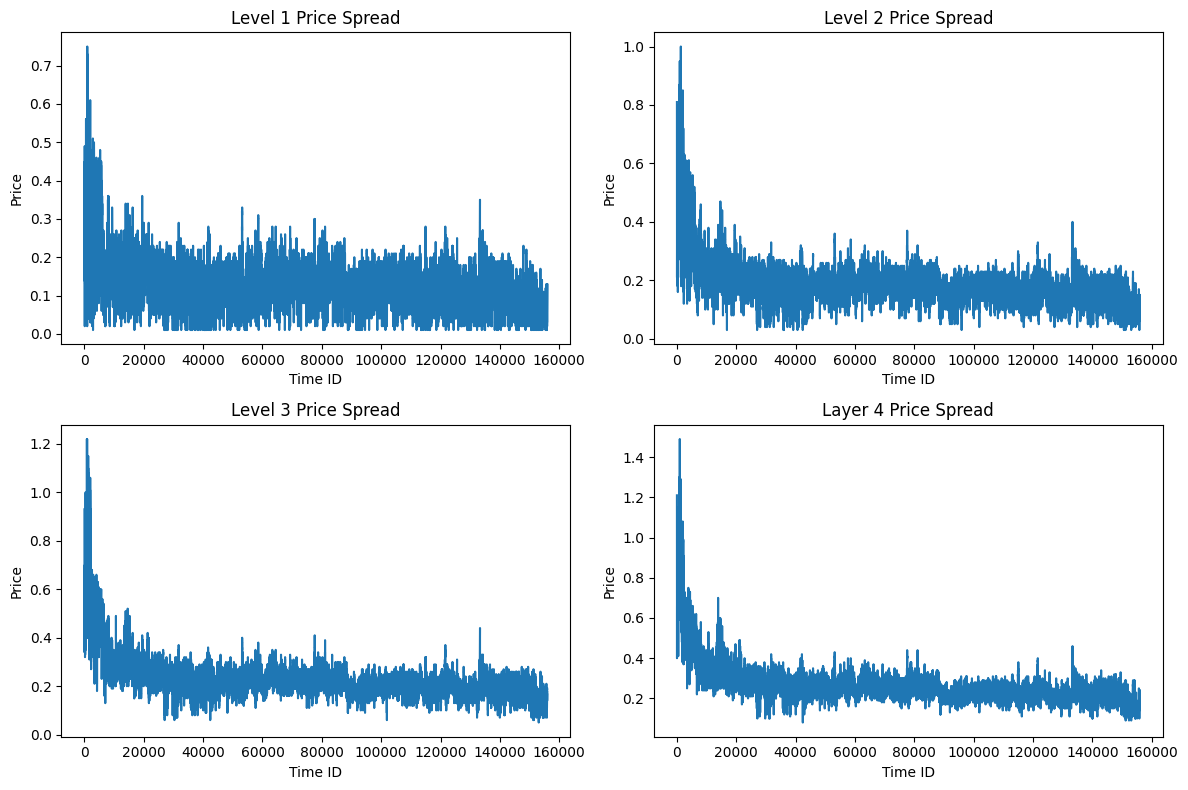

In [40]:


fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(book['price_spread_l1'])
axes[0, 0].set_title('Level 1 Price Spread')
axes[0, 0].set_xlabel('Time ID')
axes[0, 0].set_ylabel('Price')

axes[0, 1].plot(book['price_spread_l2'])
axes[0, 1].set_title('Level 2 Price Spread')
axes[0, 1].set_xlabel('Time ID')
axes[0, 1].set_ylabel('Price')

axes[1, 0].plot(book['price_spread_l3'])
axes[1, 0].set_title('Level 3 Price Spread')
axes[1, 0].set_xlabel('Time ID')
axes[1, 0].set_ylabel('Price')

axes[1, 1].plot(book['price_spread_l4'])
axes[1, 1].set_title('Layer 4 Price Spread')
axes[1, 1].set_xlabel('Time ID')
axes[1, 1].set_ylabel('Price')

plt.tight_layout()
plt.show()

# These plots show how price spread varies along the day.Comparing the spread difference across different levels too
# One can realize that the spread is large across all 4 levels at the start of the day



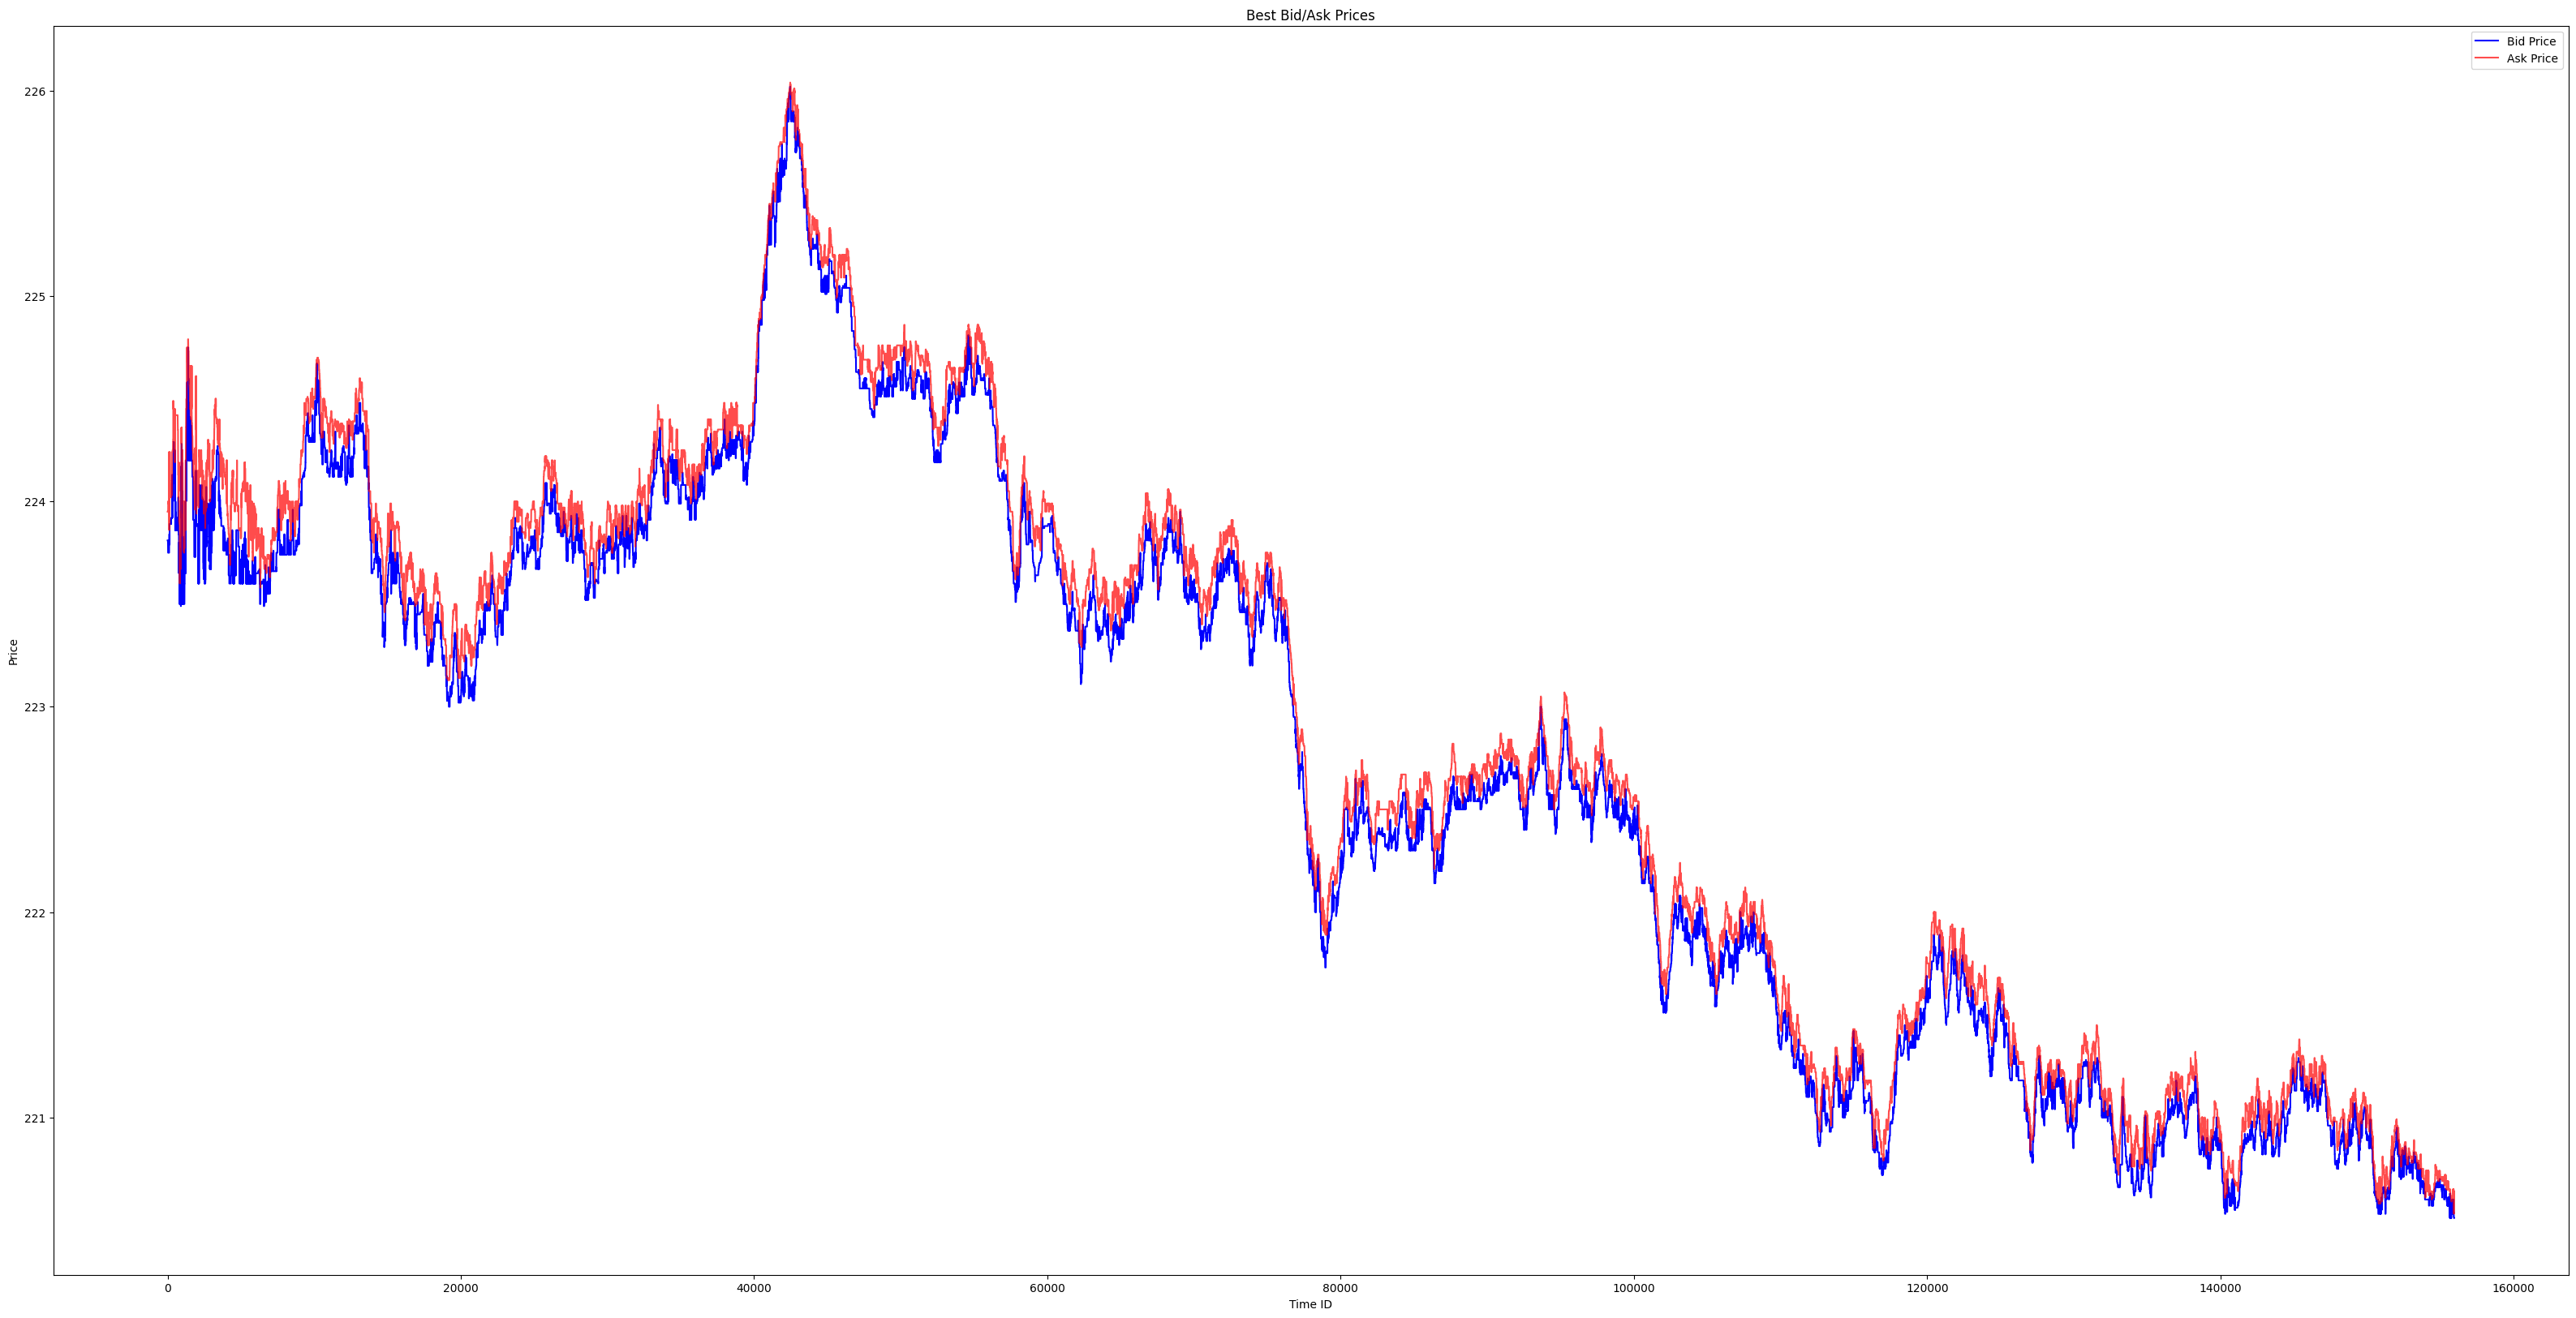

In [41]:
plt.figure(figsize=(40, 20))
plt.plot(book['Bid_Price_1'], c='b', label='Bid Price')
plt.plot(book['Ask_Price_1'], c='r', label='Ask Price', alpha=0.7)

plt.title('Best Bid/Ask Prices')
plt.xlabel('Time ID')
plt.ylabel('Price')
plt.legend()

plt.show()

# Bid Prices for Level 1 shown in Blue
# Ask Prices for Level 1 shown in Red

# From the plot below we can see that the ask is consistently higher than the bid which makes perfect sense considering market dynamics
#  (sellers always want more than you can buy for)

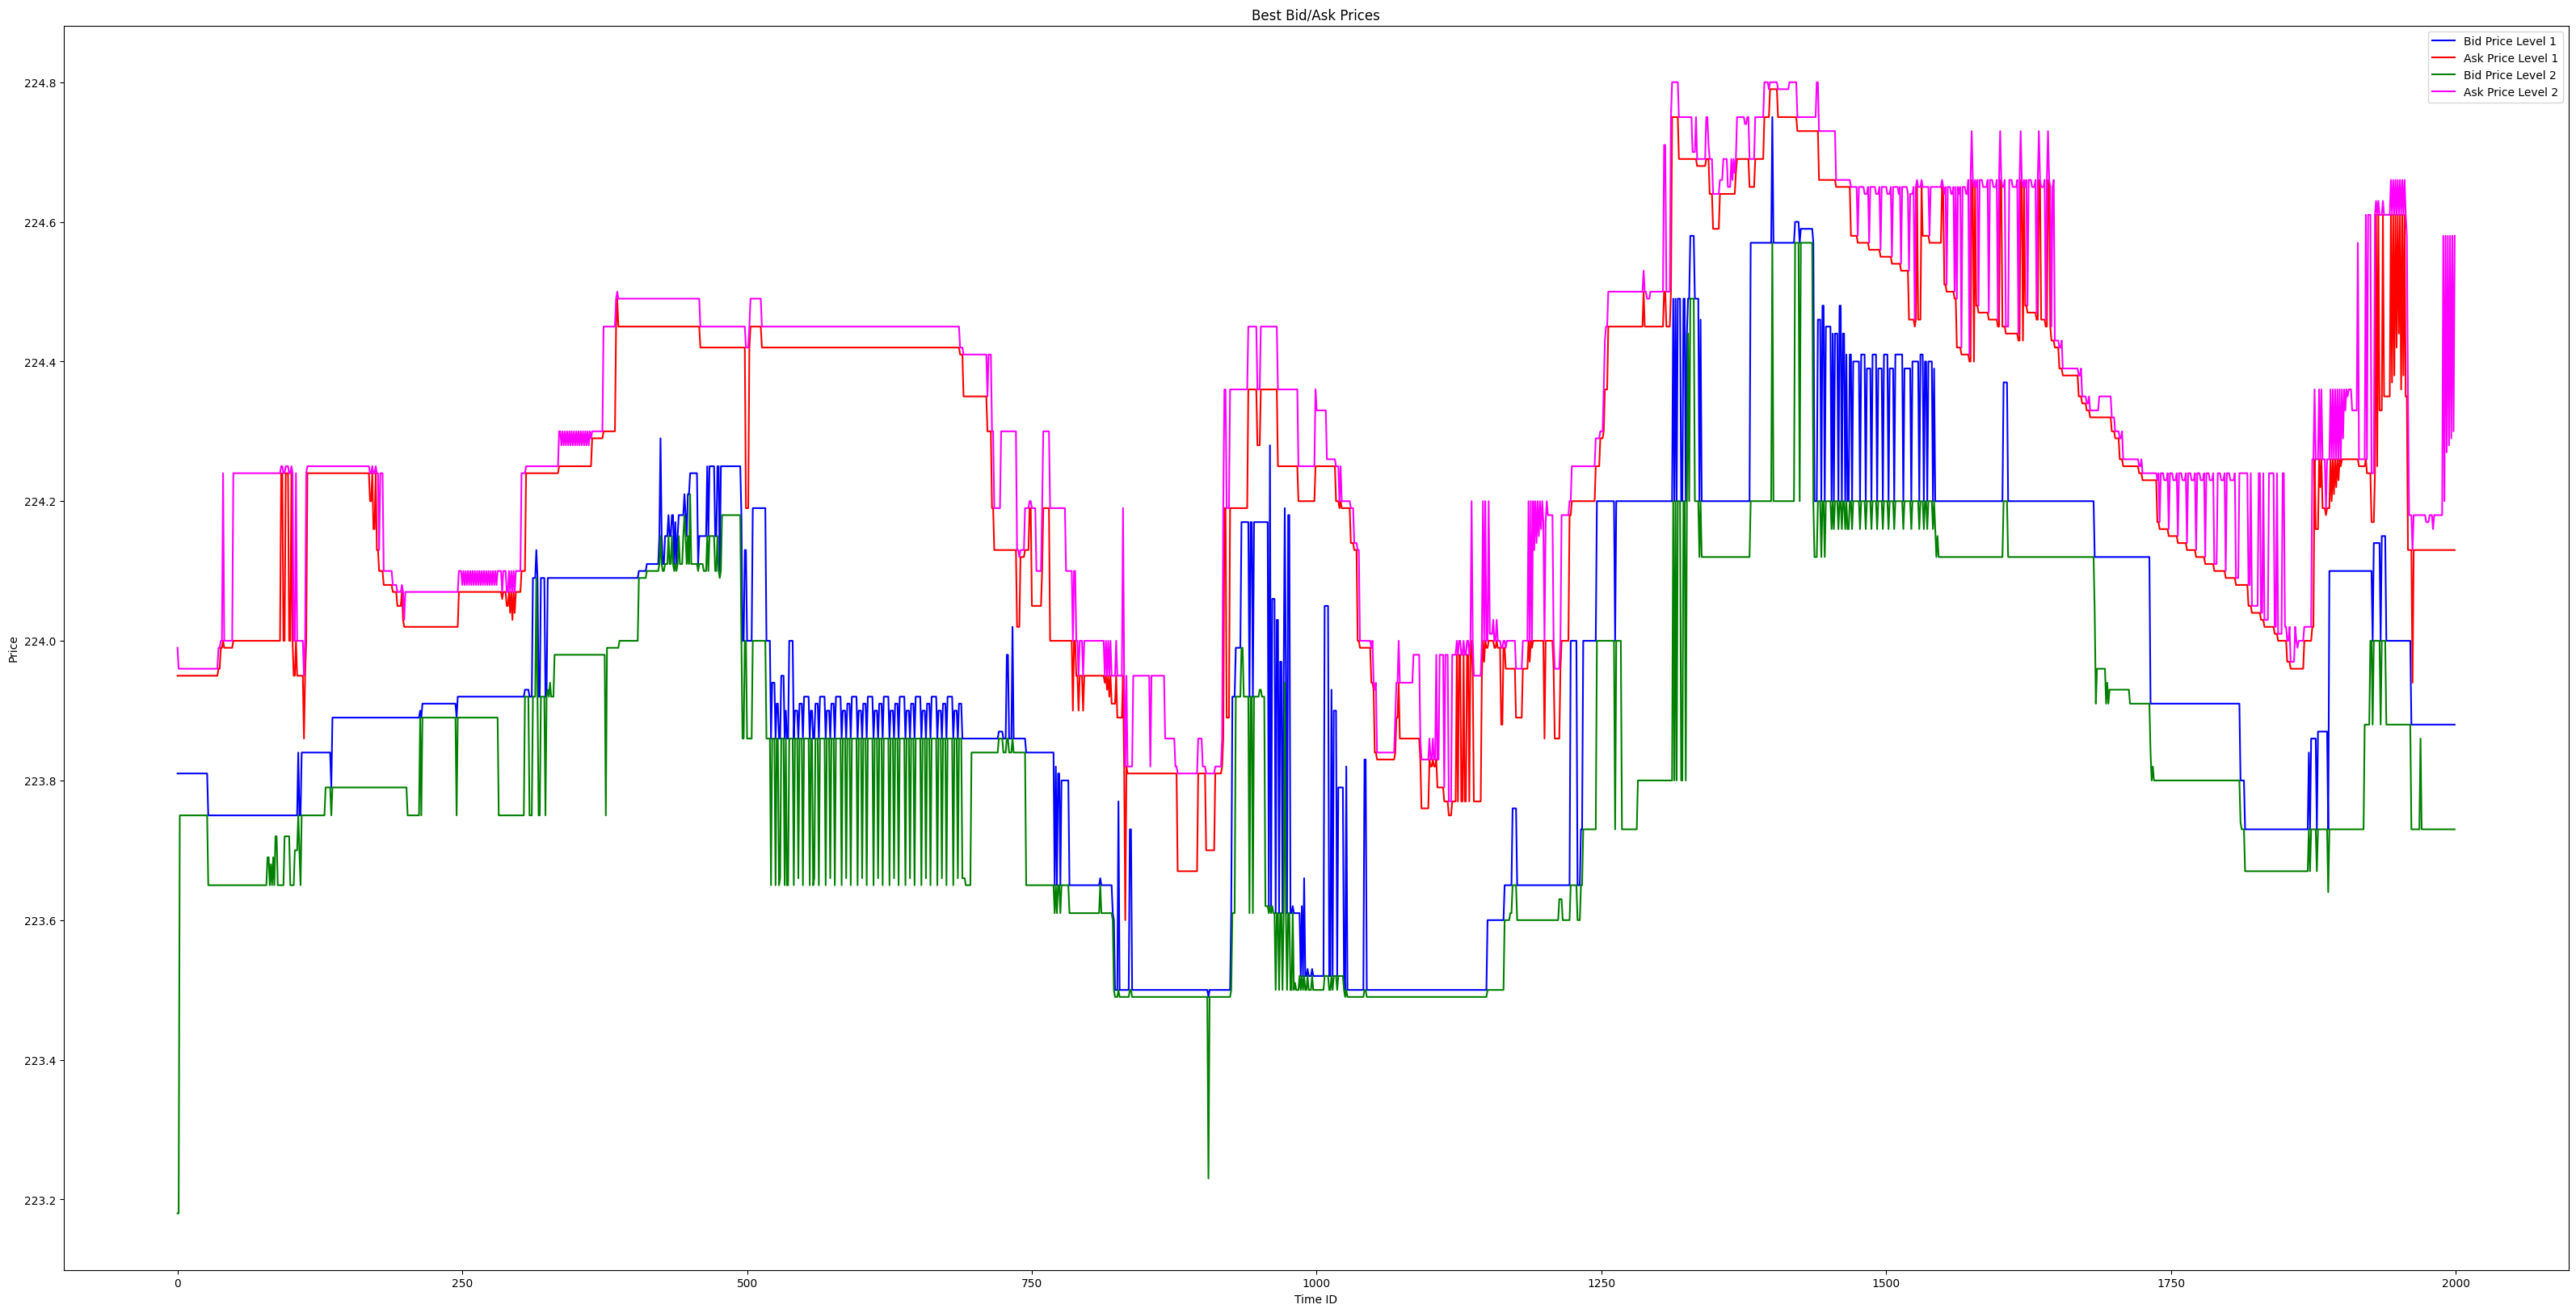

In [42]:
plt.figure(figsize=(40, 20))
plt.plot(book['Bid_Price_1'].head(2000), c='b', label='Bid Price Level 1')
plt.plot(book['Ask_Price_1'].head(2000), c='r', label='Ask Price Level 1')
plt.plot(book['Bid_Price_2'].head(2000), c='g', label='Bid Price Level 2')
plt.plot(book['Ask_Price_2'].head(2000), c='magenta', label='Ask Price Level 2')

plt.title('Best Bid/Ask Prices')
plt.xlabel('Time ID')
plt.ylabel('Price')
plt.legend()

plt.show()

# This plot shows how the Bid/Ask prices vary Level wise for the first 2000 seconds of trading.
# Blue - Bid Price Level 1
# Red - Ask Price Level 1
# Green - Bid Price Level 2
# Magenta - Ask Price Level 2

# The graph is fluctuating a lot since there is a lot more volatility at the start of the day


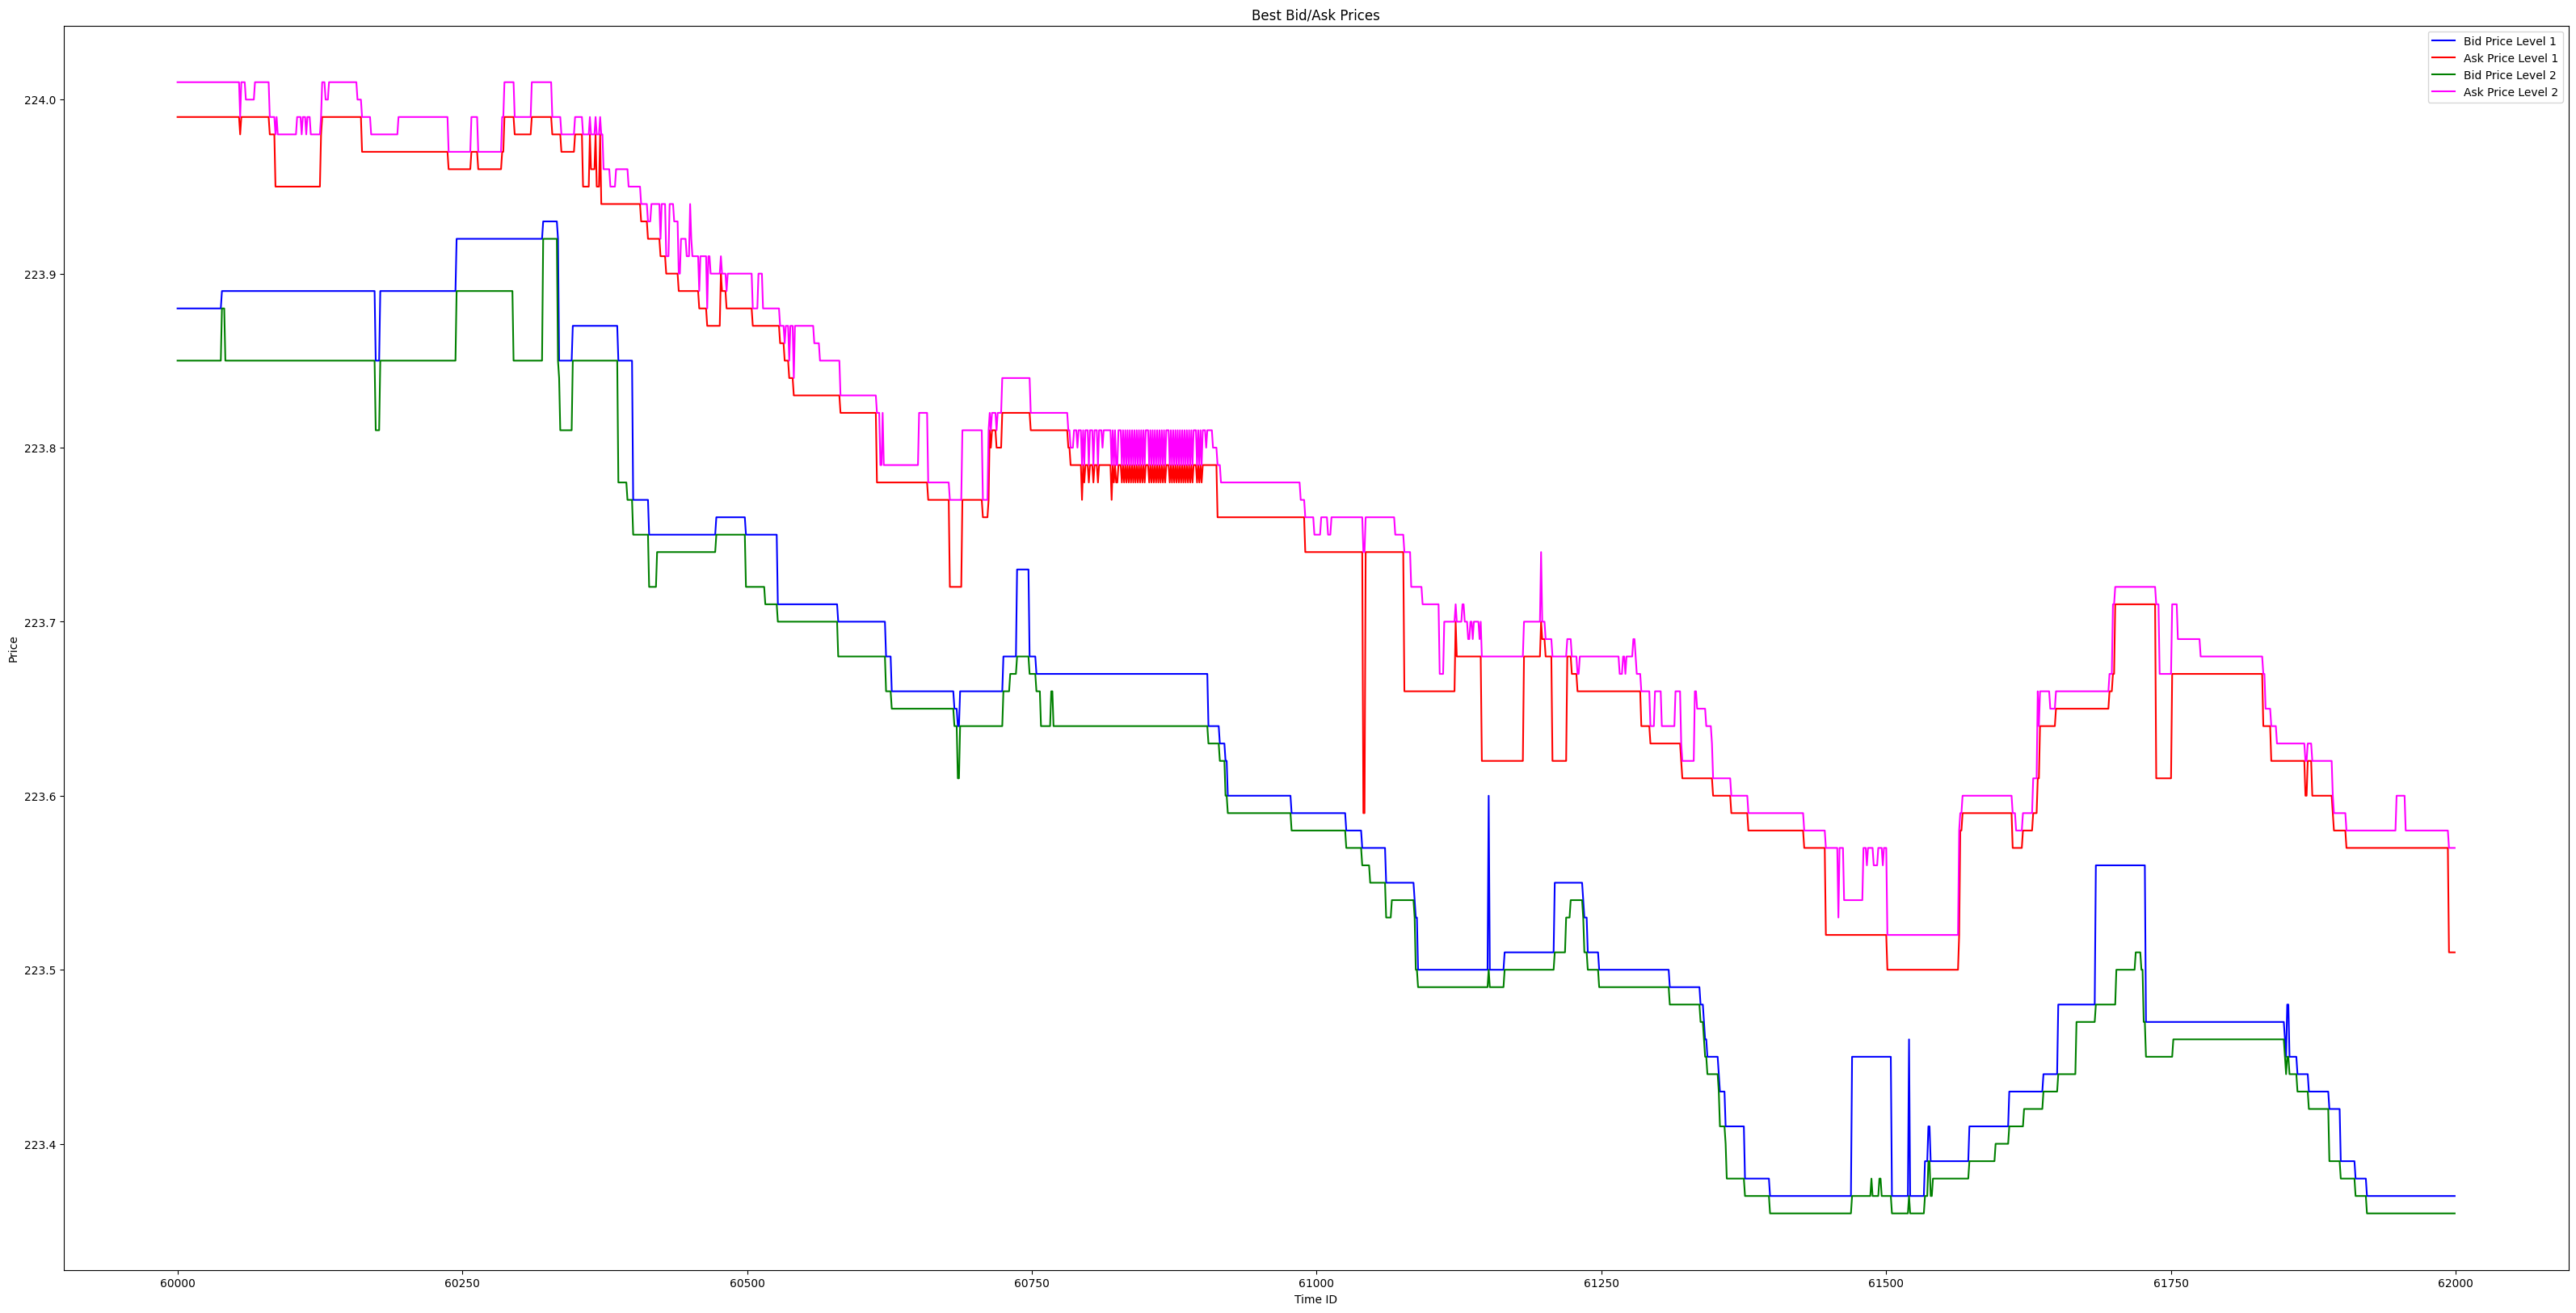

In [43]:
plt.figure(figsize=(40, 20))
plt.plot(book['Bid_Price_1'].iloc[60000:62000], c='b', label='Bid Price Level 1')
plt.plot(book['Ask_Price_1'].iloc[60000:62000], c='r', label='Ask Price Level 1')
plt.plot(book['Bid_Price_2'].iloc[60000:62000], c='g', label='Bid Price Level 2')
plt.plot(book['Ask_Price_2'].iloc[60000:62000], c='magenta', label='Ask Price Level 2')

plt.title('Best Bid/Ask Prices')
plt.xlabel('Time ID')
plt.ylabel('Price')
plt.legend()

plt.show()

# This plot shows how the Bid/Ask prices vary Level wise 60000 seconds into the trading day in a 2000 second time interval.
# Blue - Bid Price Level 1
# Red - Ask Price Level 1
# Green - Bid Price Level 2
# Magenta - Ask Price Level 2

# One can notice the much smoother trend at this time of the day than at the very start.